In [81]:
import numpy
import matplotlib.pyplot as plt

In [82]:
def d8_value(x, y):
    n = 8
    alpha = (x == 0).astype(int)
    alpha[alpha == 0] = 2
    alpha = numpy.sqrt(alpha / n)
    return numpy.around(alpha * numpy.cos((numpy.pi * (2 * y + 1) * x) / (2 * n)), 4)


In [83]:
d8 = numpy.fromfunction(d8_value, shape=(8, 8))
print(d8)


[[ 0.3536  0.3536  0.3536  0.3536  0.3536  0.3536  0.3536  0.3536]
 [ 0.4904  0.4157  0.2778  0.0975 -0.0975 -0.2778 -0.4157 -0.4904]
 [ 0.4619  0.1913 -0.1913 -0.4619 -0.4619 -0.1913  0.1913  0.4619]
 [ 0.4157 -0.0975 -0.4904 -0.2778  0.2778  0.4904  0.0975 -0.4157]
 [ 0.3536 -0.3536 -0.3536  0.3536  0.3536 -0.3536 -0.3536  0.3536]
 [ 0.2778 -0.4904  0.0975  0.4157 -0.4157 -0.0975  0.4904 -0.2778]
 [ 0.1913 -0.4619  0.4619 -0.1913 -0.1913  0.4619 -0.4619  0.1913]
 [ 0.0975 -0.2778  0.4157 -0.4904  0.4904 -0.4157  0.2778 -0.0975]]


[[1036    0  232    0  228    0  -60    0]
 [ -14    0  243    0 -181    0 -224    0]
 [  78    0  -97    0 -108    0  290    0]
 [ -74    0   75    0  -68    0   82    0]
 [  42    0   51    0 -122    0   21    0]
 [ 162    0 -163    0   21    0   56    0]
 [   6    0  -99    0  127    0   -8    0]
 [  47    0   52    0 -126    0   19    0]]


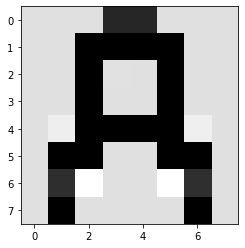

In [84]:
image = numpy.array([
    [192, 192, 192,  33,  33, 192, 192, 192,],
    [192, 192,   0,   0,   0,   0, 192, 192,],
    [192, 192,   0, 193, 192,   0, 192, 192,],
    [192, 192,   0, 192, 192,   0, 192, 192,],
    [192, 204,   0,   0,   0,   0, 205, 192,],
    [192,   0,   0, 192, 192,   0,   0, 192,],
    [192,  40, 219, 192, 192, 219,  41, 192,],
    [192,   0, 192, 192, 192, 192,   0, 192,],
])

JD = numpy.around(d8.dot(image).dot(numpy.linalg.inv(d8)), 2)

print(JD.astype(int))
plt.imshow(image, cmap='gray')
plt.show()

In [85]:
def case(m, n, dim = 8):
    x = numpy.repeat([d8[m]], 8, axis=0).T
    y = numpy.repeat([d8[n]], 8, axis=0)

    return x * y


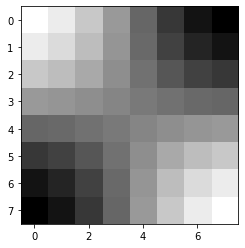

In [86]:
value = numpy.cos(numpy.pi / (2 * 8))**2 / 8 * 2
plt.imshow(case(1, 1), cmap="gray", vmin = -value, vmax = value)


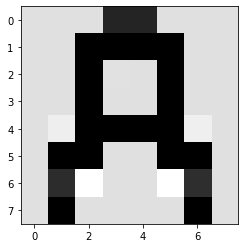

In [87]:
image_tout = numpy.zeros((8, 8))

for k in range(8):
    for i in range(8):
        image_tout += case(k, i) * JD[k][i]

image_tout = (numpy.around(image_tout) - numpy.min(image_tout)).astype(int)

plt.imshow(image_tout, cmap='gray')
plt.show()


In [88]:
def image_state(n : int) -> numpy.ndarray:
    image_partiel = numpy.zeros((8, 8))
    JD_copy = numpy.moveaxis(numpy.abs(JD.copy()), 0, 1)
    replace_min = numpy.min(JD_copy) - 1

    for _ in range(n):
        index = numpy.where(JD_copy == numpy.max(JD_copy))
        y, x = index[0][0], index[1][0]
        image_partiel += case(x, y) * JD[x][y]
        JD_copy[y][x] = replace_min

    return numpy.around(image_partiel)


[[  62.   62.   62.  -97.  -97.   62.   62.   62.]
 [  62.   62. -130. -130. -130. -130.   62.   62.]
 [  62.   62. -130.   63.   62. -130.   62.   62.]
 [  62.   62. -130.   62.   62. -130.   62.   62.]
 [  62.   74. -130. -130. -130. -130.   75.   62.]
 [  62. -130. -130.   62.   62. -130. -130.   62.]
 [  62.  -90.   89.   62.   62.   89.  -89.   62.]
 [  62. -130.   62.   62.   62.   62. -130.   62.]]


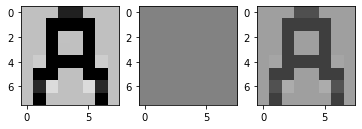

In [89]:
image_partiel = image_state(1)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap = "gray", vmin = 0, vmax = 255)
plt.subplot(1, 3, 2)
plt.imshow(image_partiel, cmap = "gray", vmin = 0, vmax = 255)
plt.subplot(1, 3, 3)
plt.imshow(image - image_partiel, cmap = "gray", vmin = -255, vmax = 255)
print(image - image_partiel)
plt.show()


In [90]:
def root_mean_square_error(image):
    return numpy.sqrt((image ** 2).sum() / (image.shape[0] * image.shape[1]))

def signal_to_noise_ratio(default, image):
    return 10 * numpy.log10((default ** 2).sum() / ((image ** 2).sum() + 1))


57.7 8.7
25.0 16.0
16.7 19.5
0.9 45.2
0.2 56.0


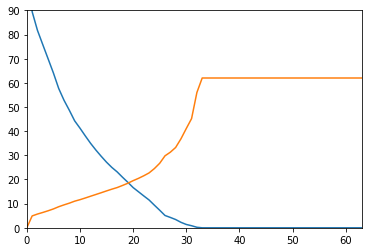

In [91]:
x = [k for k in range(64)]
RSME = [root_mean_square_error(image - image_state(k)) for k in x]
SNR = [signal_to_noise_ratio(image, image - image_state(k)) for k in x]

for i in (6, 16, 20, 31, 32):
    print(numpy.around(RSME[i], 1), numpy.around(SNR[i], 1))

plt.plot(x, RSME, SNR)
plt.axis([0, 63, 0, 90])
plt.show()
